In [1]:
# --- 1. Imports and File Paths ---
import pandas as pd
import numpy as np

In [2]:
#pip install pyarrow

In [3]:
#pip install fastparquet

In [4]:
# --- 2. Load Data ---
# Adjust the file name/path as needed for your project structure!
df = pd.read_parquet('../Data/housing_features_final.parquet')

In [5]:
# --- 3. Prepare Features and Target ---
target = 'log_price'
drop_cols = [col for col in ['log_price', 'price', 'date_of_transfer', 'transaction_unique_identifier'] if col in df.columns]
features = [col for col in df.columns if col not in drop_cols]
X = df[features]
y = df[target]


In [6]:
# --- 4. Combine for PyCaret ---
df_pycaret = X.copy()
df_pycaret[target] = y

In [7]:
import pandas as pd

# Identify period columns
period_cols = [col for col in df_pycaret.columns if pd.api.types.is_period_dtype(df_pycaret[col])]
print("Period columns to fix:", period_cols)

# Option 1: Convert period to string
for col in period_cols:
    df_pycaret[col] = df_pycaret[col].astype(str)

Period columns to fix: ['year_month']


C:\Users\Jo\AppData\Local\Temp\ipykernel_23492\3370546603.py:4: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  period_cols = [col for col in df_pycaret.columns if pd.api.types.is_period_dtype(df_pycaret[col])]


## Option 1: Turn Off Polynomial Features

This is the most robust fix for large datasets. You will still get powerful models (like LightGBM, CatBoost, Random Forest) without polynomial expansion.

In [ ]:
# from pycaret.regression import *

# reg_setup = setup(
#     data=df_pycaret,
#     target=target,
#     session_id=42,
#     normalize=True,
#     # polynomial_features=False,    # Default is False, but make explicit
#     remove_multicollinearity=True,
#     multicollinearity_threshold=0.95,
#     verbose=False
# )

## Option 2: Use a Data Sample (for Prototyping)

If you must test polynomial features, run PyCaret on a small subsample for fast experiments:

In [ ]:
# from pycaret.regression import *

# df_small = df_pycaret.sample(n=10000, random_state=42)  # adjust n as needed
# reg_setup = setup(
#     data=df_small,
#     target=target,
#     session_id=42,
#     normalize=True,
#     polynomial_features=True,
#     remove_multicollinearity=True,
#     multicollinearity_threshold=0.95,
#     verbose=False
# )

In [ ]:
# # --- 6. Compare All Models and Select Best ---
# best_models = compare_models(n_select=3, sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3475,0.2232,0.4720,0.4470,0.0357,0.0286,1.0650
gbr,Gradient Boosting Regressor,0.3689,0.2462,0.4958,0.3903,0.0375,0.0304,2.1800
rf,Random Forest Regressor,0.3892,0.2677,0.5170,0.3363,0.0392,0.0320,6.7890
et,Extra Trees Regressor,0.4144,0.3055,0.5523,0.2427,0.0418,0.0341,4.2250
br,Bayesian Ridge,0.4339,0.3320,0.5760,0.1766,0.0435,0.0357,0.6290
omp,Orthogonal Matching Pursuit,0.4366,0.3342,0.5779,0.1710,0.0437,0.0359,0.5870
ada,AdaBoost Regressor,0.4536,0.3491,0.5904,0.1347,0.0448,0.0376,1.5030
huber,Huber Regressor,0.4406,0.3550,0.5953,0.1169,0.0448,0.0362,0.8910
knn,K Neighbors Regressor,0.4776,0.3967,0.6294,0.0165,0.0476,0.0393,0.6010
en,Elastic Net,0.4869,0.4038,0.6351,-0.0008,0.0480,0.0400,0.6000


In [ ]:
# # --- 7. Blend/Ensemble Top Models ---
# blender = blend_models(best_models, fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3694,0.2466,0.4966,0.3762,0.0377,0.0304
1,0.3620,0.2299,0.4795,0.4083,0.0364,0.0298
2,0.3712,0.2566,0.5065,0.3995,0.0382,0.0304
Mean,0.3675,0.2444,0.4942,0.3946,0.0374,0.0302
Std,0.0040,0.0110,0.0112,0.0135,0.0008,0.0003


In [ ]:
# # --- 8. Finalize Best Model and Evaluate ---
# final_model = finalize_model(blender)
# holdout_results = predict_model(final_model)

LightGBMError: The number of features in data (319) is not the same as it was in training data (320).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [ ]:
# --- 8. Finalize Best Model and Evaluate ---

# ONLY use your 10,000-row sample for both setup and validation
df_small = df_pycaret.sample(n=10000, random_state=42)

from pycaret.regression import *
reg_setup = setup(
    data=df_small,
    target=target,
    session_id=42,
    normalize=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    verbose=False
)

best = compare_models()
final_model = finalize_model(best)
holdout_results = predict_model(final_model)   # DO NOT pass data=... unless it's [feature_names]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3245,0.1980,0.4445,0.5095,0.0337,0.0267,0.1880
gbr,Gradient Boosting Regressor,0.3469,0.2221,0.4708,0.4498,0.0357,0.0286,0.1220
rf,Random Forest Regressor,0.3689,0.2457,0.4952,0.3914,0.0375,0.0304,0.4070
et,Extra Trees Regressor,0.4136,0.3054,0.5522,0.2430,0.0417,0.0340,0.2680
huber,Huber Regressor,0.4326,0.3335,0.5772,0.1731,0.0436,0.0355,0.0210
br,Bayesian Ridge,0.4351,0.3337,0.5774,0.1725,0.0436,0.0358,0.0160
lr,Linear Regression,0.4353,0.3338,0.5774,0.1723,0.0436,0.0358,0.0250
ridge,Ridge Regression,0.4353,0.3338,0.5775,0.1722,0.0437,0.0358,0.2310
ada,AdaBoost Regressor,0.4458,0.3398,0.5824,0.1586,0.0442,0.0369,0.0690
omp,Orthogonal Matching Pursuit,0.4704,0.3798,0.6159,0.0586,0.0466,0.0387,0.0140


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3155,0.1886,0.4343,0.5604,0.0332,0.0261


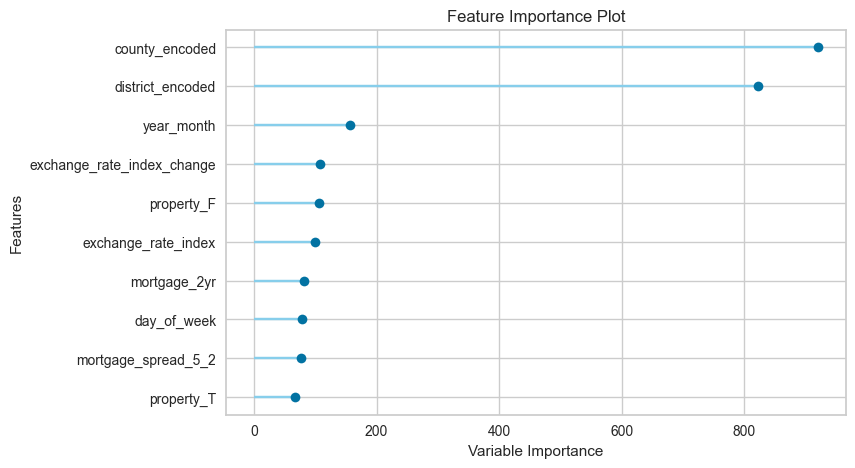

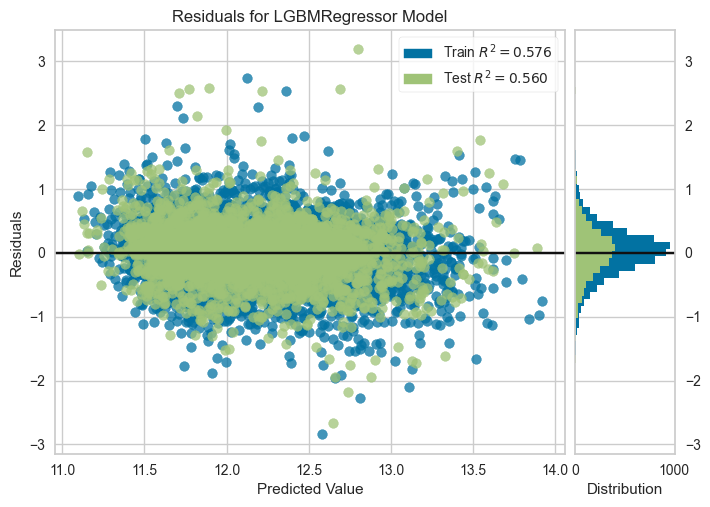

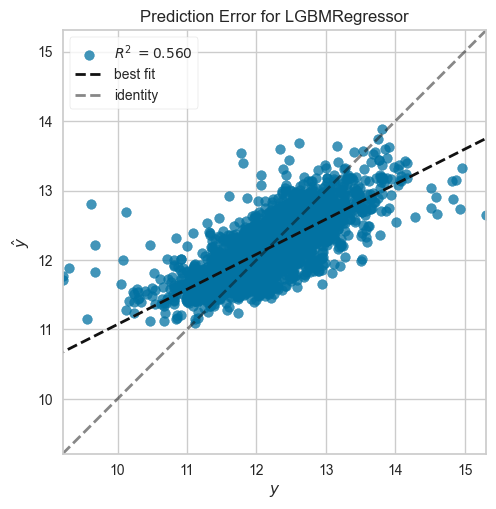

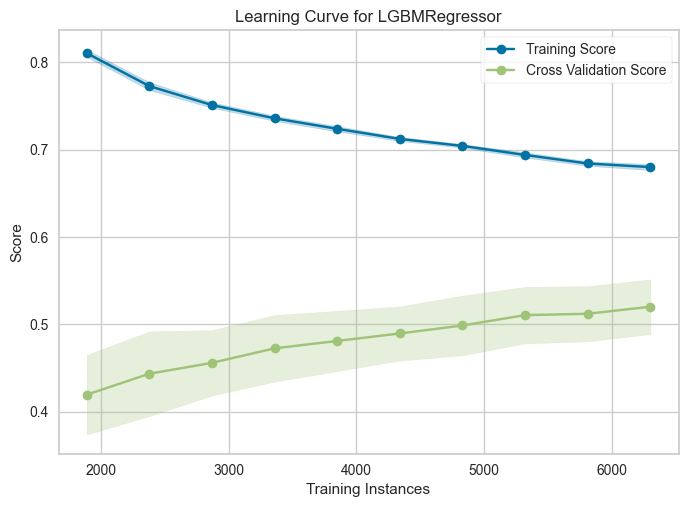

In [16]:
# --- 9. Visual Diagnostics ---
plot_model(final_model, plot='feature')
plot_model(final_model, plot='residuals')
plot_model(final_model, plot='error')
plot_model(final_model, plot='learning')

In [21]:
# --- 10. Optionally: Save the Model for Deployment ---
save_model(final_model, 'Models\pycaret_best_housing_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['year', 'month', 'quarter',
                                              'base_rate', 'mortgage_2yr',
                                              'mortgage_10yr',
                                              'exchange_rate_index',
                                              'is_new_build', 'day_of_week',
                                              'is_weekend', 'is_spring',
                                              'is_summer', 'is_autumn',
                                              'is_winter', 'month_sin',
                                              'month_cos', 'years_since_2008',
                                              'is_crisis_period',
                                              'is_recovery_p...
                  TransformerWrapper(include=['year_month'],
                                     transformer=TargetEncoder(cols=['year_m

In [25]:
# --- 11. Results Summary ---
print(holdout_results[['log_price', 'Label']].describe())

KeyError: "['Label'] not in index"